# Modulacja AM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

## Przykładowy sygnał

(-100.0, 100.0)

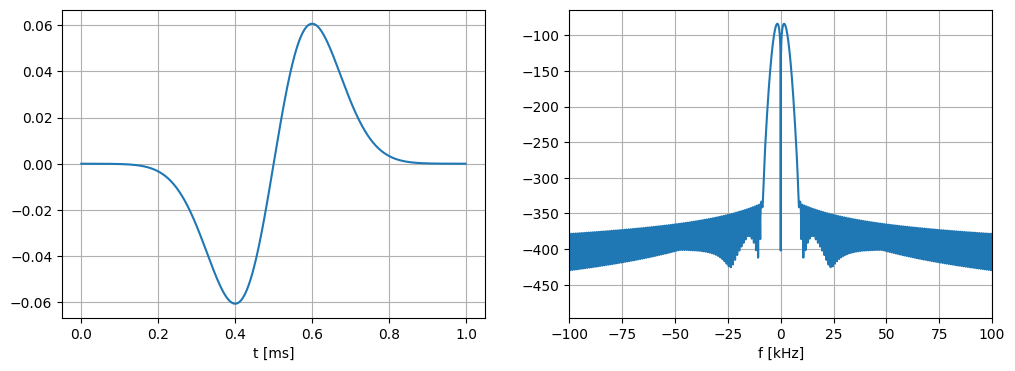

In [ ]:
dt = 1e-6
T = 1e-3
N = int(T/dt)
Nfft = N*10

n = np.arange(N)
t = n*dt

s = np.exp(-0.5*(t-T/2)**2/(0.1*T)**2)*(t-T/2)/T

S = np.fft.fftshift(np.fft.fft(s, Nfft))/N

f = (np.arange(Nfft) - Nfft/2)/Nfft/dt

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(t*1e3, s)
plt.xlabel('t [ms]')
plt.grid('on')

plt.subplot(122)
plt.plot(f*1e-3, 20*np.log(np.abs(S)))
plt.xlabel('f [kHz]')
plt.grid('on')
plt.xlim([-100, 100])

## Modulacja amplitudy

(-100.0, 100.0)

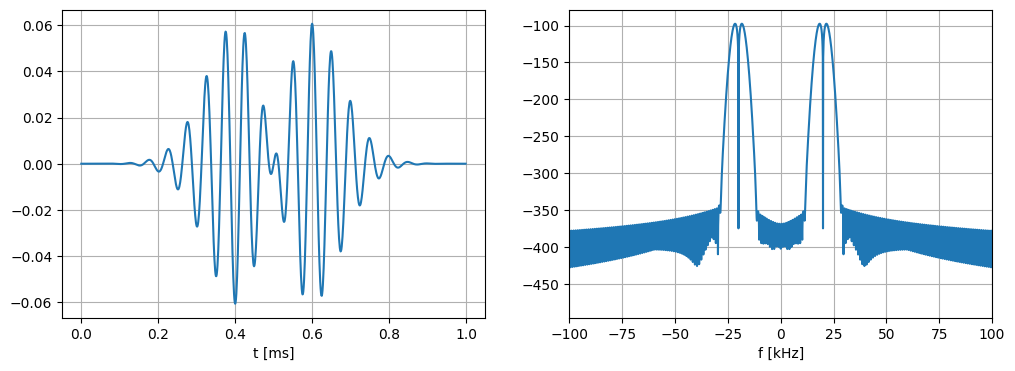

In [ ]:
fc = 20e3
c = np.cos(2*np.pi*fc * t)

m = s*c
M = np.fft.fftshift(np.fft.fft(m, Nfft))/N


plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(t*1e3, m)
plt.xlabel('t [ms]')
plt.grid('on')

plt.subplot(122)
plt.plot(f*1e-3, 20*np.log(np.abs(M)))
plt.xlabel('f [kHz]')
plt.grid('on')
plt.xlim([-100, 100])

## Projekt filtru dolnoprzepustowego

(-60.0, 20.0)

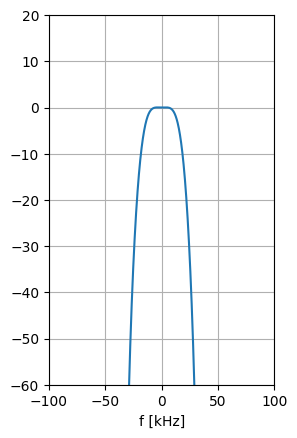

In [ ]:
fs = 1/dt
f0 = 20e3
order = 128


a = scipy.signal.firwin(order, f0, fs=fs)
A = np.fft.fftshift(np.fft.fft(a, Nfft))

plt.subplot(122)
plt.plot(f*1e-3, 20*np.log(np.abs(A)))
plt.xlabel('f [kHz]')
plt.grid('on')
plt.xlim([-100, 100])
plt.ylim([-60, 20])


## Przemiana częstotliwości

(-100.0, 100.0)

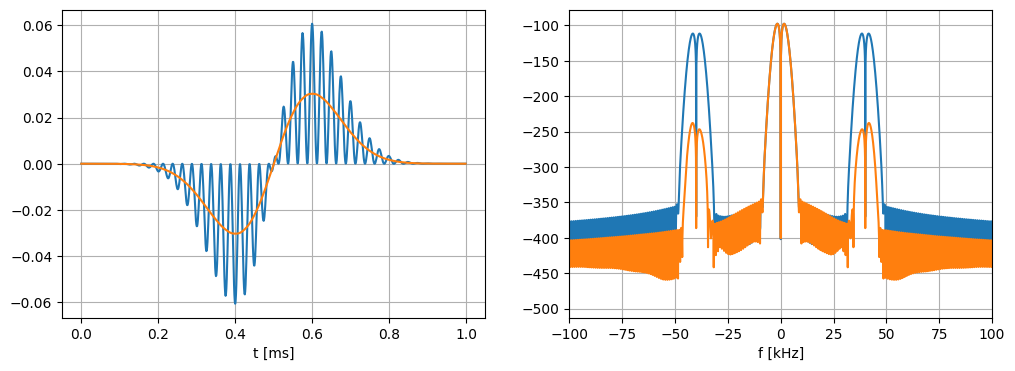

In [ ]:
# Przemiana częstotliwości (mieszacz)
m1_1 = m * np.cos(2*np.pi*fc*t)
M1_1 = np.fft.fftshift(np.fft.fft(m1_1, Nfft))/N

# Filtracja dolnoprzepustową
m1_2 = scipy.signal.convolve(m1_1, a, mode='same')
M1_2 = np.fft.fftshift(np.fft.fft(m1_2, Nfft))/N

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(t*1e3, m1_1, t*1e3, m1_2)
plt.xlabel('t [ms]')
plt.grid('on')

plt.subplot(122)
plt.plot(f*1e-3, 20*np.log(np.abs(M1_1)), f*1e-3, 20*np.log(np.abs(M1_2)))
plt.xlabel('f [kHz]')
plt.grid('on')
plt.xlim([-100, 100])

## Przesunięcie fazy

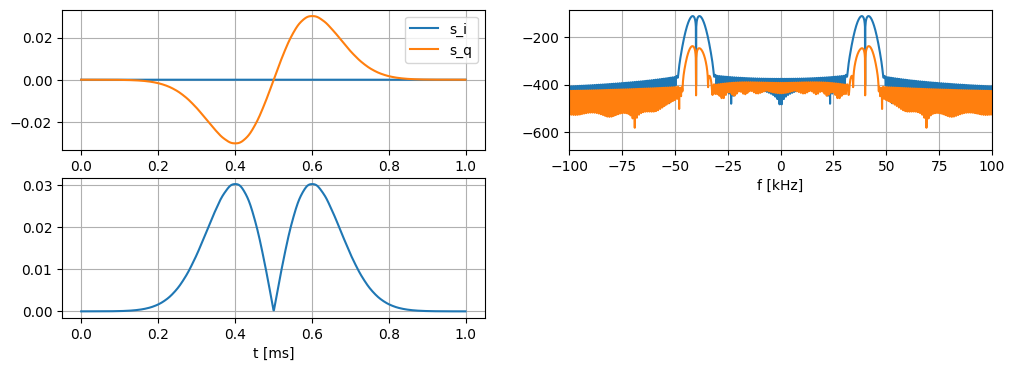

In [ ]:
phi = 90*np.pi/180

# Przemiana częstotliwości (mieszacz)
m2_1i = m * np.cos(2*np.pi*fc*t + phi)
M2_1i = np.fft.fftshift(np.fft.fft(m2_1i, Nfft))/N

m2_1q = m * np.sin(2*np.pi*fc*t + phi)
M2_1q = np.fft.fftshift(np.fft.fft(m2_1q, Nfft))/N


# Filtracja dolnoprzepustową
m2_2i = scipy.signal.convolve(m2_1i, a, mode='same')
M2_2i = np.fft.fftshift(np.fft.fft(m2_2i, Nfft))/N

m2_2q = scipy.signal.convolve(m2_1q, a, mode='same')
M2_2q = np.fft.fftshift(np.fft.fft(m2_2q, Nfft))/N

# Odtworzenie sygnału
m2_3 = np.sqrt(m2_2i**2 + m2_2q**2)

cphi_ = m2_2i/m2_3
sphi_ = m2_2q/m2_3

#m2_4 = m2_2i*np.cos(phi) + m2_2q*np.sin(phi)
m2_4 = m2_2i*cphi_ + m2_2q*sphi_

plt.figure(figsize=(12,4))

plt.subplot(221)
plt.plot(t*1e3, m2_2i, t*1e3, m2_2q)
plt.xlabel('t [ms]')
plt.grid('on')
plt.legend(('s_i', 's_q'))

plt.subplot(222)
plt.plot(f*1e-3, 20*np.log(np.abs(M2_1i)), f*1e-3, 20*np.log(np.abs(M2_2i)))
plt.xlabel('f [kHz]')
plt.grid('on')
plt.xlim([-100, 100])

plt.subplot(223)
plt.plot(t*1e3, m2_3)
plt.xlabel('t [ms]')
plt.grid('on')

## Operacje na liczbach zespolonych

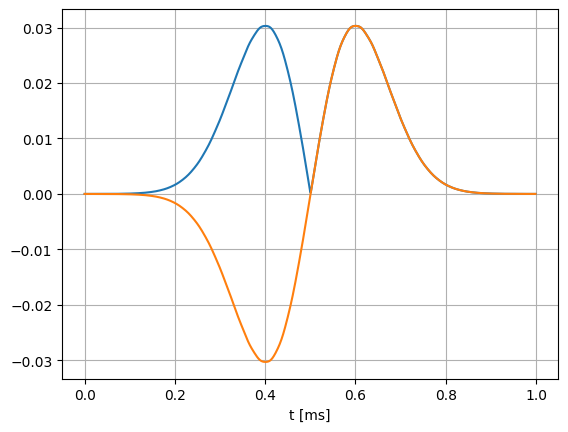

In [ ]:
phi = 90*np.pi/180

# Przemiana częstotliwości (mieszacz)
m2_1i = m * np.cos(2*np.pi*fc*t + phi)
m2_1q = m * np.sin(2*np.pi*fc*t + phi)
m2_1 = m2_1i + 1j*m2_1q

# Filtracja dolnoprzepustową
m2_2 = scipy.signal.convolve(m2_1, a, mode='same')

# Odtworzenie sygnału
m2_3 = np.abs(m2_2)
m2_4 = m2_2 * np.exp(-1j*phi)

plt.plot(t*1e3, m2_3, t*1e3, np.real(m2_4))
plt.xlabel('t [ms]')
plt.grid('on')